## Preprocessing Data

In [56]:
import numpy as np
import pandas as pd
import keras

from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [57]:
general_train = pd.read_csv("https://raw.githubusercontent.com/reykel/machine_learning_keras_tf/main/health.csv", names=["age", "health"])
shuffled_general_train = general_train.sample(frac=1)

general_test = pd.read_csv("https://raw.githubusercontent.com/reykel/machine_learning_keras_tf/main/health_test.csv", names=["age", "health"])
shuffled_general_test = general_test.sample(frac=1)

In [58]:
train_labels, train_samples = np.array(shuffled_general_train["health"]), np.array(shuffled_general_train["age"])
test_labels, test_samples = np.array(shuffled_general_test["health"]), np.array(shuffled_general_test["age"])

In [59]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [60]:
#print scaled data
for i in scaled_train_samples:
    print(i)

[0.40229885]
[0.93103448]
[0.05747126]
[0.16091954]
[0.44827586]
[0.34482759]
[0.66666667]
[0.37931034]
[0.93103448]
[0.97701149]
[0.18390805]
[0.7816092]
[0.67816092]
[0.29885057]
[0.2183908]
[0.10344828]
[0.04597701]
[0.12643678]
[0.74712644]
[0.56321839]
[0.90804598]
[0.5862069]
[0.93103448]
[0.73563218]
[0.11494253]
[0.63218391]
[0.90804598]
[0.57471264]
[0.02298851]
[0.11494253]
[0.06896552]
[0.20689655]
[0.20689655]
[0.6091954]
[0.28735632]
[0.59770115]
[0.36781609]
[0.03448276]
[0.49425287]
[0.5862069]
[0.79310345]
[0.77011494]
[0.18390805]
[0.93103448]
[0.01149425]
[0.31034483]
[0.1954023]
[0.25287356]
[0.98850575]
[0.09195402]
[0.51724138]
[0.10344828]
[0.8045977]
[0.2183908]
[0.22988506]
[0.79310345]
[0.85057471]
[0.65517241]
[0.3908046]
[0.85057471]
[0.68965517]
[0.2183908]
[0.94252874]
[0.87356322]
[0.33333333]
[0.90804598]
[0.59770115]
[0.02298851]
[0.97701149]
[0.52873563]
[0.28735632]
[0.47126437]
[0.68965517]
[0.40229885]
[0.90804598]
[0.24137931]
[0.43678161]
[0.954022

## Simple Sequential Model


In [61]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                32        
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(Adam(learning_rate=.0003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
189/189 - 1s - loss: 0.6976 - accuracy: 0.4767 - val_loss: 0.6588 - val_accuracy: 0.6333 - 970ms/epoch - 5ms/step
Epoch 2/20
189/189 - 0s - loss: 0.6223 - accuracy: 0.6910 - val_loss: 0.5954 - val_accuracy: 0.7524 - 367ms/epoch - 2ms/step
Epoch 3/20
189/189 - 0s - loss: 0.5546 - accuracy: 0.7646 - val_loss: 0.5279 - val_accuracy: 0.7905 - 397ms/epoch - 2ms/step
Epoch 4/20
189/189 - 0s - loss: 0.4785 - accuracy: 0.8360 - val_loss: 0.4462 - val_accuracy: 0.8238 - 374ms/epoch - 2ms/step
Epoch 5/20
189/189 - 0s - loss: 0.4006 - accuracy: 0.8794 - val_loss: 0.3758 - val_accuracy: 0.8905 - 404ms/epoch - 2ms/step
Epoch 6/20
189/189 - 0s - loss: 0.3457 - accuracy: 0.9053 - val_loss: 0.3360 - val_accuracy: 0.9095 - 338ms/epoch - 2ms/step
Epoch 7/20
189/189 - 0s - loss: 0.3103 - accuracy: 0.9185 - val_loss: 0.3086 - val_accuracy: 0.9143 - 396ms/epoch - 2ms/step
Epoch 8/20
189/189 - 0s - loss: 0.2876 - accuracy: 0.9238 - val_loss: 0.2906 - val_accuracy: 0.9429 - 365ms/epoch - 2ms/step


## Preprocess Test Data

In [65]:
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

## Predict

In [66]:
rounded_predictions = np.argmax(model.predict(scaled_test_samples, batch_size=10, verbose=0), axis=-1 )

In [67]:
for i in rounded_predictions:
    print(i)

1
1
1
0
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
1
0
0
0
1
0
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
0
0
1
1
0
0
0
1
0
0
1
0
1
0
0
1
1
1
0
1
1
0
0
0
0
1
0
1
1
1
1
1
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
1
0
1
0
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
1
1
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
0
0
0
1
1
0
0
1
1
1
0
0
0
0
1
0
0
0
1
1
0
1
1
0
1
0
0
1
1
0
1
0
1
0
0
0
0
1
1
0
0
1
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
1
1
0
0
0
1
1
0
1
1
1
1
1
0
0
1
1
1
0
0
0
1
0
0
1
0
1
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
0
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
1
1
0
1
1
0
0
0
0
1
0
1
0
1
0
0
1
1
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
1
1
0
1
1
0
1
1
0
1
1
1
0
0
1
1


## Confusion Matrix

In [68]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


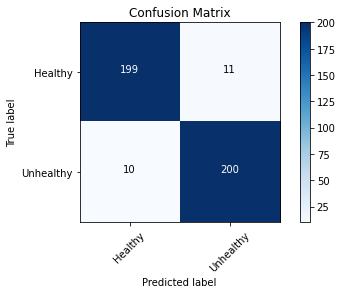

In [70]:
cm_plot_labels = ['Healthy','Unhealthy']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')